# ECS7020P mini-project submission

The mini-project has two separate components:


1.   **Basic component** [6 marks]: Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips.
2.   **Advanced component** [10 marks]: Formulate your own machine learning problem and build a machine learning solution using the MLEnd Yummy Dataset.

**Submit two Jupyter notebooks**, one for the basic component and another one for advanced component. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zip and submit them toghether**.

Each uploaded notebook should include:

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** (9 sections) indicated below. Notebooks might not be run, please make sure that the **output cells are saved**.

How will we evaluate your submission?

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience.

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  Addalin Lariena Rose Devasahaya Rajan

**Student ID**:  230187746



# 2 Problem formulation

The machine learning problem that will be solved here is to predict wheather an image has chips or rice. What is interesting about this problem is that how we can identify images using features extracted from them to predict if it is rice or chips

# 3 Machine Learning pipeline

The pipeline consists of the following stages:

**Sampling and Data Preprocessing**


A sample of 99 dishes is downloaded to the google drive from the MLEnd library. The images are then resized so that all of them have the same dimensions.

**Transformation Stage**


Feature extraction of the images is done by using cv2 library. The 5 features extracted from the images are colorfulness, average color intensity and average per color channel. Each of the resized images will be converted into an array with 3 values of the feature extracted value to reduce the dimentionality.

**Normalization**

The values of the feature extraction needed to be normalized as they are not in same units, therefore standardization is done to bring them all in similar range of values.

**Modeling**


The model chosen is Linear SVC since this is a binary classification problem that predicts whether the image is chips or rice.

**Methodology**

The 5 features of the resized images will be extracted into an array, instead of an array filled with pixel values it will be 5 single values each representing a feature. Then the model will predict for the training and testing sets, from which the mean of their predictions will be used to ensure that the model is neither overfitting nor underfitting, and to check its prediction accuracy. To further validate its prediction, a confusion matrix is done to understand how well the model is able to predict if the image is chips or rice.

**Results**


From the prediction accuracy and confusion matrix, the Linear SVC model has the highest accuracy for prediction and the highest values for true positive and true negative values.

**Conclusion**


From this, we can conclude that using 5 different features extracted from the images binary classification can be done. Further improvements can be made, such as using pre-trained models such as CNN for a larger dataset to extract more features from the images for a greater accuracy.

# 4 Dataset


A sample of 99 dishes is downloaded to the google drive from the MLEnd library. The data is then split to training and testing using the library's yummy_small_load function. The images are then loaded from the google drive and resized so that all of them have the same dimensions. They are splitted into arrays of X_train_f, X_test_f, Y_train, and Y_test.

In [1]:
pip install --upgrade opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [2]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
baseDir = download_yummy_small(save_to = '/content/drive/MyDrive/Data/MLEnd')
baseDir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|99\99|00099.jpg
Done!


'/content/drive/MyDrive/Data/MLEnd/yummy'

In [5]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv').set_index('filename')
MLENDYD_df

,Dish_name,Home_restaurant,Cuisine,Ingredients,Diet,Healthiness_rating,How_much_did_you_like_it,Rice_Chips,Benchmark_A
filename,,,,,,,,,
00001.jpg,steak_&_fries,resturaunt,american,"steak,fries,mixed_salad",non-veg,neutral,strongly_like,chips,Test
00002.jpg,beef_burger_meal,restaurant,american,"chips,burger,chicken_nugget",non-veg,unhealthy,like,chips,Train
00003.jpg,chicken_burger_with_fries_and_wings,restaurant,american,"fried_chicken_breast,lettuce,ketchup,sesame_se...",non-veg,unhealthy,like,chips,Train
00004.jpg,fried_rice_with_curd,home,indian,"rice,onion,potato,tomato,olive_oil,curd",vegetarian,neutral,like,rice,Train
00005.jpg,fish_and_chips,tcr_bar,british,"cod,beer,flour,tartare_sauce,peas,oil",vegetarian,neutral,strongly_like,chips,Test
...,...,...,...,...,...,...,...,...,...
00095.jpg,breaded_chicken_with_katsu_curry_sauce_rice_&_...,the_curve,japanese,"chicken,curry,rice,greens,bell_pepper",non-veg,healthy,strongly_like,rice,Train
00096.jpg,chicken_wrap_with_fries,roosters_piri_piri,portuguese,"tortilla_wrap,chicken,olive_oil,piri_piri_sauc...",non-veg,healthy,strongly_like,chips,Train
00097.jpg,butter_chicken,restaurant,indian,"garlic,tomato,onion,white_rice,naan_bread,cash...",non-veg,neutral,like,rice,Train


In [6]:
sample_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/*.jpg'
files = glob.glob(sample_path)
len(files)

99

(-0.5, 1207.5, 907.5, -0.5)

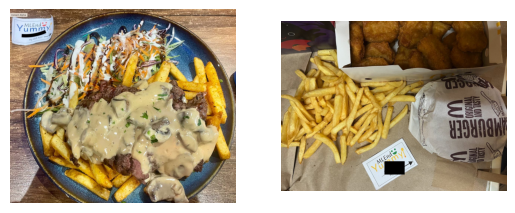

In [7]:
I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00002.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

In [8]:
TrainSet, TestSet, Map = yummy_small_load(datadir_main=baseDir,train_test_split='Benchmark_A')

Total 99 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/


In [9]:
TrainSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [10]:
TestSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [11]:
Map

{'Rice_Chips': {'chips': 0, 'rice': 1}}

Let us plot all the labels in the training dataset using the values 'chips' and 'rice':

In [12]:
TrainSet['Y']

array(['chips', 'chips', 'rice', 'rice', 'rice', 'chips', 'rice', 'chips',
       'rice', 'chips', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'chips', 'chips', 'rice', 'rice', 'chips', 'rice', 'rice', 'rice',
       'rice', 'rice', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'rice', 'chips', 'chips', 'rice', 'chips', 'chips', 'chips',
       'chips', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'chips', 'chips', 'rice', 'rice', 'chips', 'chips', 'rice', 'rice',
       'rice', 'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'chips'],
      dtype=object)

In [13]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

In [14]:
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In [15]:
X_train = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test.append(I)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, X_test.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!


((70, 200, 200, 3), (29, 200, 200, 3))

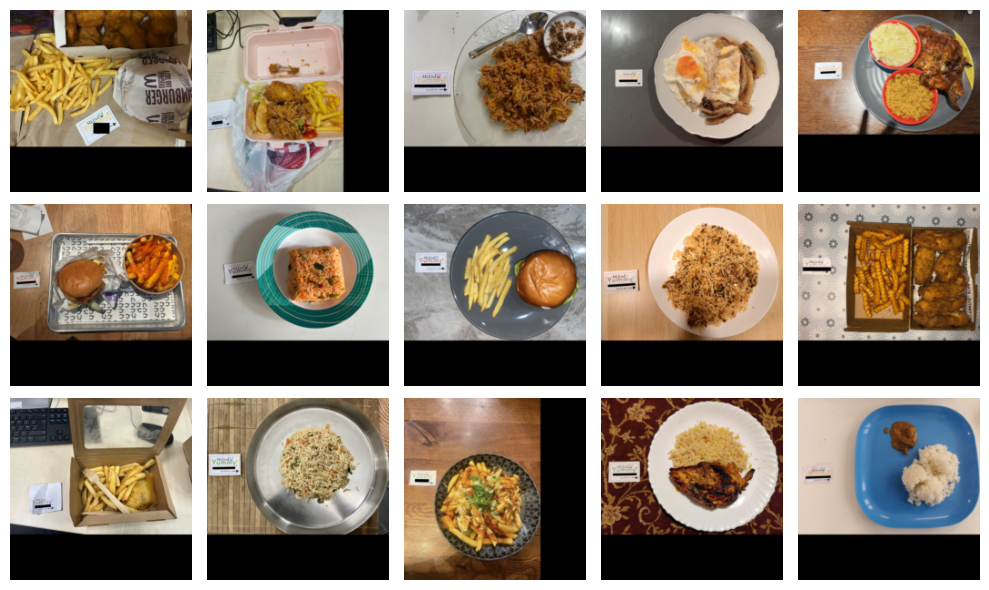

In [16]:
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

# 5 Transformation stage


5 features; colorfulness, average color intensity and average per color channel are extracted from the images. I have chosen this tranformation since it gives the featues of the pictire from different perspectives such as how much color is on the image, how bright it is and what is average per color channel for the images.

In [17]:
from skimage.feature import hog
import numpy as np
from matplotlib.image import imread
import cv2

def get_colorfulness(I):
  std_red_channel = np.std(I[:,:,2])
  std_green_channel = np.std(I[:,:,1])
  std_blue_channel = np.std(I[:,:,0])
  return np.sqrt((std_red_channel ** 2) + (std_green_channel ** 2) + (std_blue_channel ** 2))

def get_avg_color_intensity(I):
  gray_img = (rgb2gray(I)*255).astype('uint8')
  return np.mean(gray_img)

def get_avg_per_channel(I):
  avg_pixel_value_red = np.mean(I[:, :, 2])
  avg_pixel_value_green = np.mean(I[:, :, 1])
  avg_pixel_value_blue = np.mean(I[:, :, 0])
  return avg_pixel_value_red, avg_pixel_value_green, avg_pixel_value_blue


In [21]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_colorfulness(I)
  f2 = get_avg_color_intensity(I)
  f3, f4, f5 = get_avg_per_channel(I)
  X_train_f.append([f1,f2,f3,f4,f5])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_colorfulness(I)
  f2 = get_avg_color_intensity(I)
  f3, f4, f5 = get_avg_per_channel(I)
  X_test_f.append([f1,f2,f3,f4,f5])

X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)

# 6 Normalisation

The values of the feature extraction needed to be normalized as they are not in same units, therefore standardization is done to bring them all in similar range of values. Therefore, values in X_train_f and X_test_f will be normalized (X_train_fn and X_test_fn)


In [22]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

# 7 Modelling


I have chosen Logistic Regression, Linear SVC, Random forest and KNN as they will be able to solve binary classification problems but for the context of this problem their accuracy will be determined to further chose the model.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

model_1 = LogisticRegression(C=0.1)
model_2 = RandomForestClassifier(n_estimators=5,max_depth=3)
model_3 = LinearSVC(C=1)
model_4 = KNeighborsClassifier(n_neighbors=3)
model_1.fit(X_train_fn, Y_train)
model_2.fit(X_train_fn, Y_train)
model_3.fit(X_train_fn, Y_train)
model_4.fit(X_train_fn, Y_train)

KNeighborsClassifier(n_neighbors=3)

# 8 Methodology


The 5 features of the resized images will be extracted into arrays X_train_f and X_test_f, instead of an array filled with pixel values it will be 5 single values each representing a feature. After normalization of the training and testing data (X_train_fn and X_test_fn), the model will predict for the training and testing sets (X_train_fn and X_test_fn), from which the mean of their predictions will be used to ensure that the model is neither overfitting nor underfitting, and to check its prediction accuracy. To further validate its prediction, a confusion matrix is done to understand how well the model is able to predict if the image is chips or rice.

# 9 Results

From the prediction accuracy and confusion matrix, the Linear SVC model has the highest accuracy for prediction and the highest values for true positive and true negative values.

In [24]:
def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

for LogisticRegression:
Training Accuracy:	 0.6285714285714286
Test  Accuracy:	 0.5862068965517241


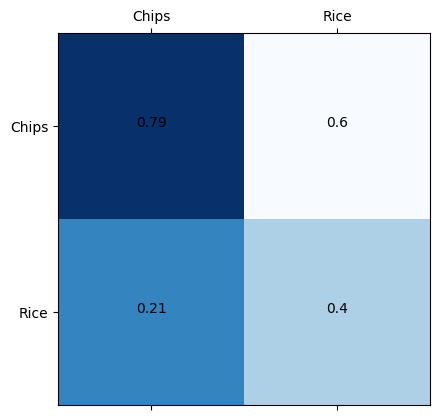


for RandomForestClassifier:
Training Accuracy:	 0.7142857142857143
Test  Accuracy:	 0.6206896551724138


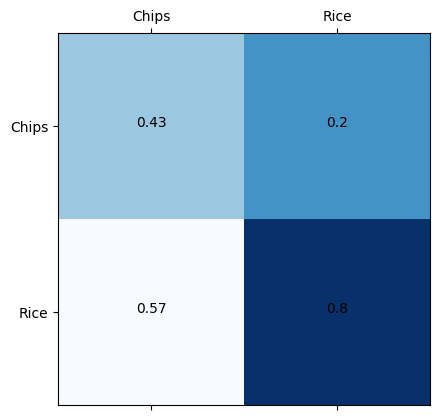


for LinearSVC:
Training Accuracy:	 0.6857142857142857
Test  Accuracy:	 0.6206896551724138


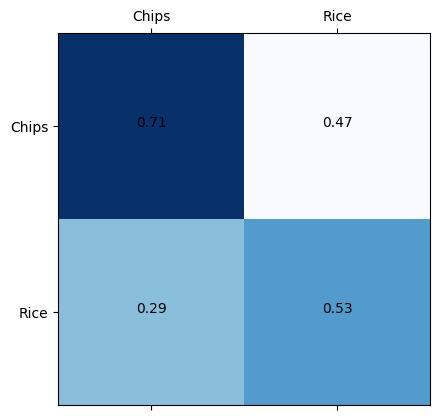


for KNeighborsClassifier:
Training Accuracy:	 0.8142857142857143
Test  Accuracy:	 0.5862068965517241


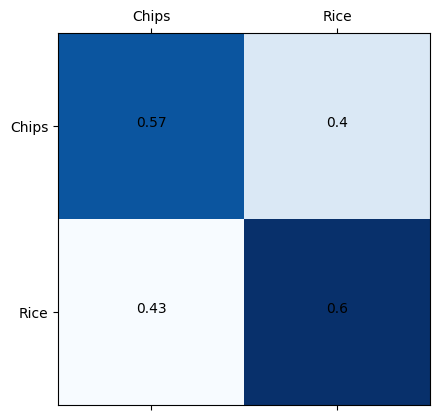

In [26]:
ytp_1 = model_1.predict(X_train_fn)
ysp_1 = model_1.predict(X_test_fn)

train_accuracy_1 = np.mean(ytp_1==Y_train)
test_accuracy_1  = np.mean(ysp_1==Y_test)

print('for LogisticRegression:')
print('Training Accuracy:\t',train_accuracy_1)
print('Test  Accuracy:\t',test_accuracy_1)

Ac = np.mean(ysp_1[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp_1[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp_1[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp_1[Y_test.astype(int)==1]==0)

CM_1 = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM_1)

print("")

ytp_2 = model_2.predict(X_train_fn)
ysp_2 = model_2.predict(X_test_fn)

train_accuracy_2 = np.mean(ytp_2==Y_train)
test_accuracy_2  = np.mean(ysp_2==Y_test)

print('for RandomForestClassifier:')
print('Training Accuracy:\t',train_accuracy_2)
print('Test  Accuracy:\t',test_accuracy_2)

Ac = np.mean(ysp_2[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp_2[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp_2[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp_2[Y_test.astype(int)==1]==0)

CM_2 = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM_2)

print("")

ytp_3 = model_3.predict(X_train_fn)
ysp_3 = model_3.predict(X_test_fn)

train_accuracy_3 = np.mean(ytp_3==Y_train)
test_accuracy_3  = np.mean(ysp_3==Y_test)

print('for LinearSVC:')
print('Training Accuracy:\t',train_accuracy_3)
print('Test  Accuracy:\t',test_accuracy_3)

Ac = np.mean(ysp_3[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp_3[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp_3[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp_3[Y_test.astype(int)==1]==0)

CM_3 = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM_3)

print("")

ytp_4 = model_4.predict(X_train_fn)
ysp_4 = model_4.predict(X_test_fn)

train_accuracy_4 = np.mean(ytp_4==Y_train)
test_accuracy_4  = np.mean(ysp_4==Y_test)

print('for KNeighborsClassifier:')
print('Training Accuracy:\t',train_accuracy_4)
print('Test  Accuracy:\t',test_accuracy_4)

Ac = np.mean(ysp_4[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp_4[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp_4[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp_4[Y_test.astype(int)==1]==0)

CM_4 = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM_4)


# 10 Conclusions

From this, we can conclude that using 5 different features extracted from the images binary classification can be done. Further improvements can be made, such as using pre-trained models such as CNN for a larger dataset to extract more features from the images for a greater accuracy.